## 빅데이터 실습

### 제주도 핫플레이스 웹크롤링

#### 셀레니움 사용

In [65]:
# 셀레니움 및 필요 라이브러리 사용 등록
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import unicodedata  #유니코드 데이터 처리 모듈
import re   #정규식 처리 모듈
import time 

In [66]:
driver = webdriver.Chrome()

##### 인스타그램 접속

In [67]:
# 인스타그램 접속
driver.get('https://www.instagram.com/')
time.sleep(2.0)

##### 자동 로그인 처리
- 로그인 화면, 아이디, 패스워드 입력하는 html name 속성이 생김(간단하게 입력 가능)

In [68]:
#인스타그램 사용자 이름(이메일) 정보 입력
email = '인스타 아이디'
input_id = driver.find_element(By.NAME, 'username')
input_id.clear()
input_id.send_keys(email)

#인스타그램 비밀번호 입력
password = '인스타 비밀번호'  #임시 비밀번호
input_pw = driver.find_element(By.NAME, 'password')
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(2.0)

##### 태그로 검색하면 30개 이상 검색 안됨
- 한 계정의 게시물로 대체

In [69]:
# 검색 결과 URL 함수
def searchInstagram(word):
    url = f'https://www.instagram.com/explore/tags/{word}'
    return url

In [70]:
#2024.03.13 현재 태그로는 30개 이상 검색 안됨
driver.get(searchInstagram('제주도맛집'))

In [73]:
# 제주나드리 게시글로 검색
#https://www.instagram.com/jeju__nadri/
driver.get('https://www.instagram.com/jeju__nadri/')

##### 게시글 클릭 후 게시글 정보 가져오기

In [75]:
# 첫번째 게시글 클릭하는 함수
first = driver.find_elements(By.CLASS_NAME, '_aagw')[0]
first.click()
time.sleep(2.0)

In [76]:
# 게시글 정보 가져오기 함수
def getCount(driver):
    pass

In [113]:
#게시글 가져오기 로직
## 1. HTML 코드 가져오기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

## 2. 팝업 본문내용 가게명 가져오기
content = soup.select('div._a9zr>div>h1')[0].text

firstIndex = str(soup.select('div._a9zr>div>h1')[0]).index('>')
lastIndex = str(soup.select('div._a9zr>div>h1')[0]).index('<br/>')
shopName = str(soup.select('div._a9zr>div>h1')[0])[firstIndex:lastIndex]

## 3. 본문 내용에서 해시태그 가져오기(정규식 활용)
tags = re.findall(r'#[^\s#\\]+', content)
tags

## 4. 포스트 작성일자
date = soup.select('time.x1p4m5qa')[0]['datetime'][:10]
date

## 5. 좋아요 개수
like = soup.select('span.xdj266r')[6].text
like

## 6. 위치 정보
# re.findall(r'(\w+[시]\s*)?', content)

'343'

##### 현재 문제
- 인스타그램 화면 UI가 두 종류, 통일해서 코딩 불가

#### 워드 클라우드(Word Cloud)
- 태그 중에서 빈도수가 높은 태그는 글자를 크게, 빈도수가 낮은 태그는 글자를 작게 표현해서 마치 구름처럼 나타내는 방법

In [114]:
# 판다스 등 필요 라이브러리 사용 등록
import pandas as pd

In [116]:
raw_total = pd.read_excel('./data/1_crawling_raw.xlsx')
raw_total['tags']

0       ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1       ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2       ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
3       ['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'...
4       ['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추...
                              ...                        
8796    ['#일상', '#구기자', '#티타임', '#2019', '#새해', '#차스타그...
8797    ['#제주', '#친정여행', '#겨울방학', '#제주여행앞머리는', '#친정찬스'...
8798                           ['#사진좀찍으시는님덕에건져또', '#이순간']
8799                                                   []
8800                            ['#HappyNewYearEveryone']
Name: tags, Length: 8801, dtype: object

In [124]:
#
raw_total['tags'][0][2:-2].split("', '")

['#제주핫플레이스',
 '#제주여행',
 '#제주여행',
 '#제주도여행',
 '#제주가볼만한곳',
 '#제주도핫플',
 '#제주여행코스',
 '#제주공항',
 '#제주도맛집',
 '#제주맛집',
 '#제주스냅',
 '#제주풍경',
 '#제주사진',
 '#제주카페',
 '#제주도카페',
 '#산굼부리',
 '#제주도바다',
 '#귤체험',
 '#우도',
 '#제주관광',
 '#제주도여향지',
 '#제주여행중',
 '#삼육오빠',
 '#제주앓이']

In [127]:
# tqdm 모듈 사용
from tqdm import tqdm

In [129]:
tagAllList = []

for tags in tqdm(raw_total['tags']):  #8800개 반복
    tagList = tags[2:-2].split("', '")  #다시 리스트로
    for tag in tagList: #개수 유동적
        tagAllList.append(tag)

100%|██████████| 8801/8801 [00:00<00:00, 183457.68it/s]


In [134]:
len(tagAllList)

149495

In [137]:
# 해시태그 출현 빈도 집계
from collections import Counter

In [139]:
tagCounts = Counter(tagAllList)

In [141]:
tagCounts.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도', 2096),
 ('#제주', 1567),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#jeju', 776),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#일상', 717),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#반영구', 443),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435)]

In [174]:
# 맛집 이외의 해시태그는 제외, 워드 클라우드 결과 보고 다시 필요없는 해시태그 추가, 정제한 뒤 다시
STOPWORDS = ['#제주도', '#제주', '#jeju', '#제주시', '#일상', '#제주도민', '#반영구', '#눈썹문신', 
            '#제주자연눈썹', '#제주속눈썹', '', '#서귀포', '#제주도그램', '#선팔', '#제주눈썹문신', '#여행스타그램'
            , '#제주살이', '#제주반영구', '#여행', '#서귀포남자눈썹문신', '#서귀포자연눈썹', '#제주남자눈썹문신'
            , '#서귀포속눈썹', '#서귀포반영구', '#제주스타그램', '#제주일상', '#소통', '#맞팔', '#제주메이크업', '#서귀포눈썹문신']

tagFilterList = []
for tag in tagAllList:
    if tag not in STOPWORDS:    #제외시킬 단어에 속하지 않으면
        tagFilterList.append(tag)

In [175]:
tagFilterCounts = Counter(tagFilterList)
tagFilterCounts.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#제주핫플레이스', 848),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#서귀포흑돼지맛집', 605),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#섭지코지맛집', 519),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#중문맛집', 472),
 ('#제주도관광', 471),
 ('#먹스타그램', 453),
 ('#애월맛집', 410),
 ('#제주시맛집', 387),
 ('#카멜리아힐', 384),
 ('#중문흑돼지맛집', 377),
 ('#daily', 362),
 ('#제주도여행코스', 361),
 ('#가족여행', 357),
 ('#제주도카페', 354),
 ('#jejuisland', 348),
 ('#제주속눈썹연장', 343),
 ('#성산맛집', 342),
 ('#제주해안도로', 337),
 ('#셀카', 332),
 ('#좋아요', 318),
 ('#서귀포맛집추천', 315),
 ('#첫줄', 311),
 ('#제주공항', 308),
 ('#한림맛집', 308),
 ('#제주공항근처맛집', 307),
 ('#서귀포문신', 291)]

In [176]:
# 시각화 라이브러리 사용 등록
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
#한글 깨짐 문제 해결

from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()  
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

In [183]:
# 차트 스타일 설정
sns.set_style('darkgrid')

In [192]:
#불필요한 경고 메시지 제거
import warnings
warnings.filterwarnings('ignore')

In [184]:
dfTagCounts = pd.DataFrame(tagFilterCounts.most_common(30))

In [185]:
dfTagCounts.columns = ['tag', 'counts']

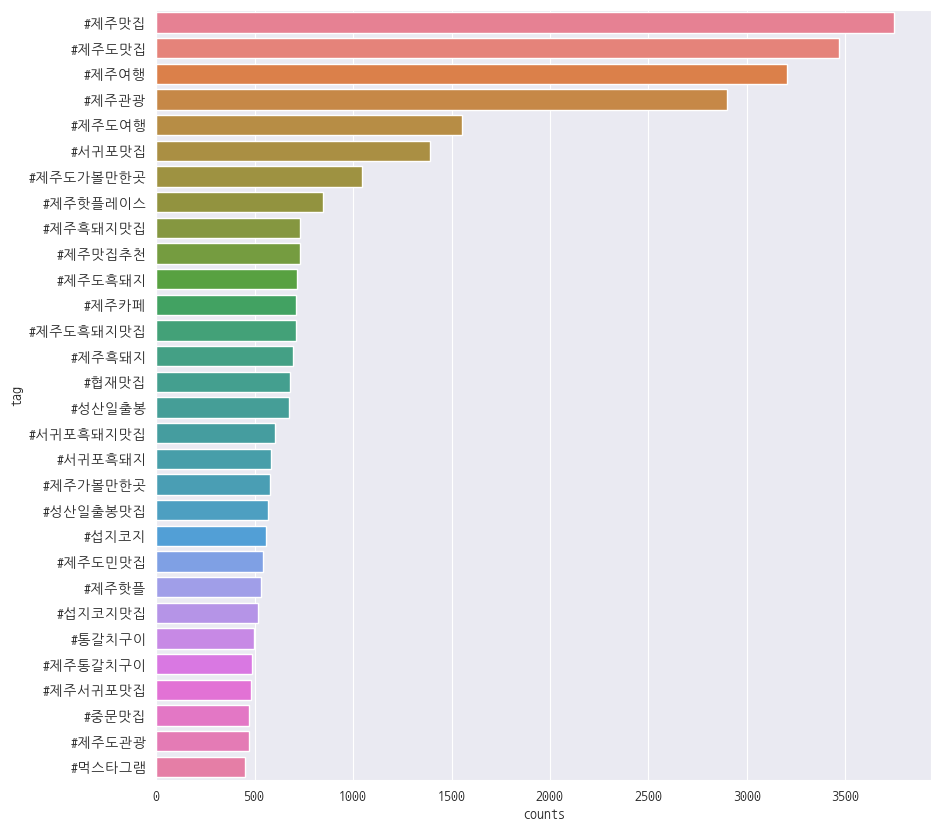

In [197]:
## 막대차트
plt.figure(figsize=(10, 10))
# palette 종류: pastel, husl, hls, set2, paired, roket, mako
sns.barplot(x='counts', y='tag', data=dfTagCounts, palette='husl')
plt.show()

In [218]:
!pip install wordcloud

In [244]:
# 워드 클라우드 라이브러리 사용 등록
from wordcloud import WordCloud

In [249]:
import platform

if platform.system() == 'Windows':
    fontPath = 'C:/Windows/Fonts/경기천년제목V_Bold.ttf'
elif platform.system() == 'Darwin': #macos
    fontPath = '/Users/$USER/Library/Font/AppleGothic.ttf'

In [236]:
import numpy as np
from PIL import Image, ImageOps

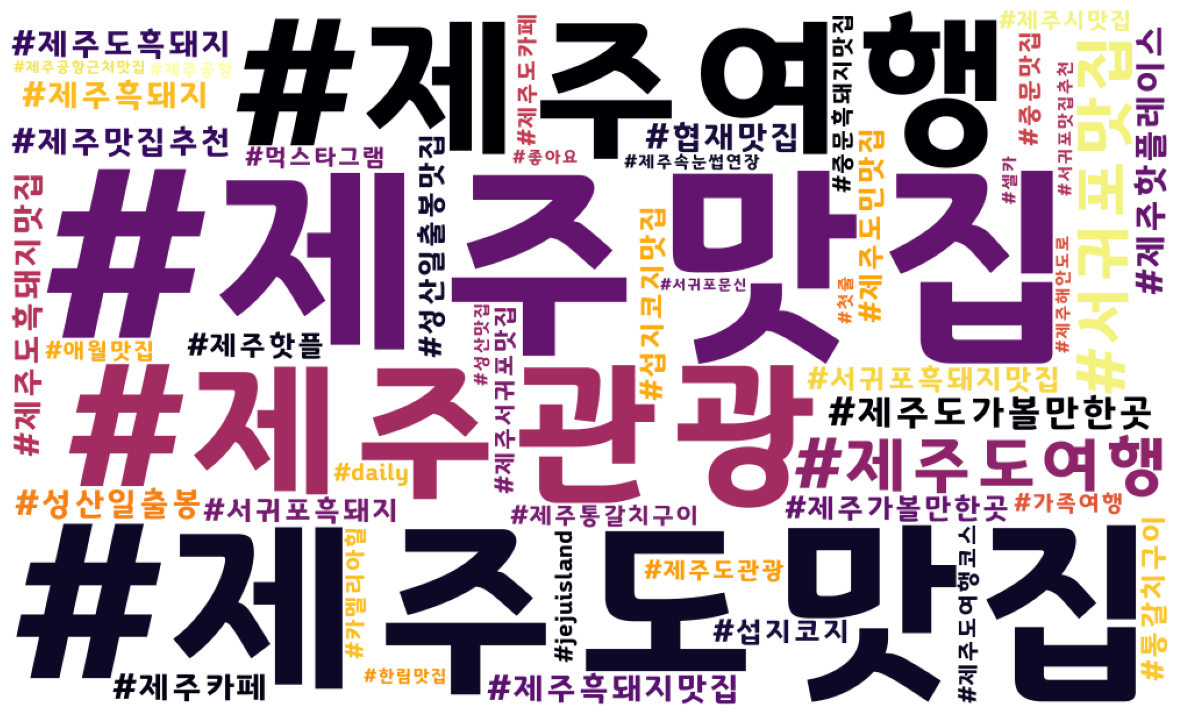

In [254]:
# 워드 클라우드 만들기
tagLast = dict(tagFilterCounts.most_common(50))
wc = WordCloud(font_path=fontPath, colormap='inferno',
                relative_scaling=0.4, width=1000, height=600,
                background_color='white', max_words=100).generate_from_frequencies(tagLast)

plt.figure(figsize=(15, 10))
plt.imshow(wc)
plt.axis('off') #x, y 좌표 숨김
plt.show()

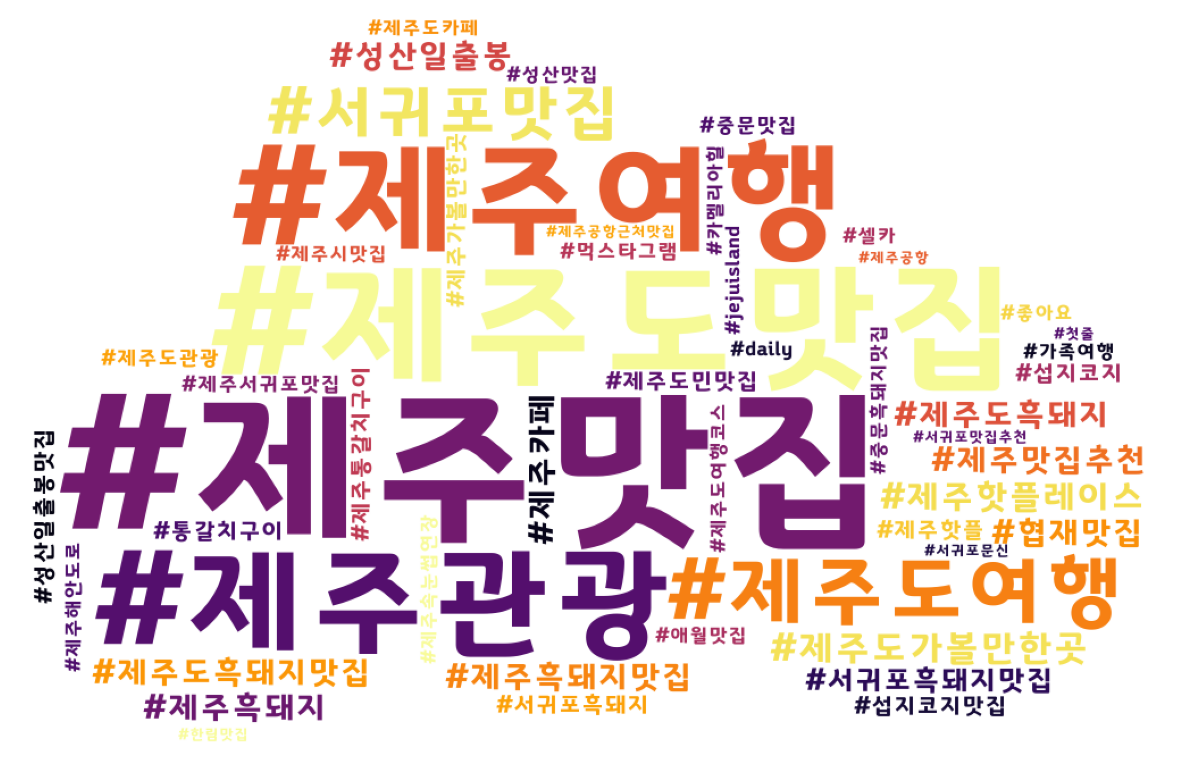

In [252]:
# 워드 클라우드 만들기 다시
tagsLast = dict(tagFilterCounts.most_common(50))

mask = np.array(Image.open('./data/cloud.png'))
mask[mask.sum(axis=2) == 0] = 255 # 마스크이미지를 여백이 0

wc = WordCloud(font_path=fontPath, colormap='inferno', mask=mask, relative_scaling=0.4, width=1000, height=600, background_color='white', max_words=100).generate_from_frequencies(tagsLast)

plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off') #x,y좌표 숨김
plt.savefig('./data/제주맛집_워드클라우드.png') #이미지 파일 저장
plt.show()

#### 지도 시각화
- Folium 사용

##### 주소에 대한 위경도 값 가져오기
- 카카오 검색 API 가입 